<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-cell----run-this-first!" data-toc-modified-id="Initialization-cell----run-this-first!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization cell -- run this first!</a></span></li><li><span><a href="#The-truncated-SVD-as-the-solution-to-an-optimization-problem" data-toc-modified-id="The-truncated-SVD-as-the-solution-to-an-optimization-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The truncated SVD as the solution to an optimization problem</a></span></li><li><span><a href="#Application:-Compression" data-toc-modified-id="Application:-Compression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Application: Compression</a></span></li><li><span><a href="#Application:-Denoising-low-rank-matrices" data-toc-modified-id="Application:-Denoising-low-rank-matrices-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Application: Denoising low rank matrices</a></span></li><li><span><a href="#Random-matrix-theory-101" data-toc-modified-id="Random-matrix-theory-101-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random matrix theory 101</a></span><ul class="toc-item"><li><span><a href="#Application:-Inferring-the-optimal-denoising-rank" data-toc-modified-id="Application:-Inferring-the-optimal-denoising-rank-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Application: Inferring the optimal denoising rank</a></span></li></ul></li><li><span><a href="#Summary:-Approximation-vs-Denoising" data-toc-modified-id="Summary:-Approximation-vs-Denoising-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary: Approximation vs Denoising</a></span></li><li><span><a href="#Additional-Exercises" data-toc-modified-id="Additional-Exercises-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Additional Exercises</a></span><ul class="toc-item"><li><span><a href="#Image-compression-and-visual-quality" data-toc-modified-id="Image-compression-and-visual-quality-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Image compression and visual quality</a></span></li><li><span><a href="#Noise-variance-and-de-noising-error" data-toc-modified-id="Noise-variance-and-de-noising-error-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Noise variance and de-noising error</a></span></li></ul></li><li><span><a href="#(Optional)-Improved-denoising-using-Optshrink" data-toc-modified-id="(Optional)-Improved-denoising-using-Optshrink-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>(Optional) Improved denoising using Optshrink</a></span></li></ul></div>

# Initialization cell -- run this first!

In [1]:
using Images, Plots, Colors, Interact, LinearAlgebra
# using FileIO
gr(; markerstrokewidth=0.3, markerstrokecolor=:white, alpha=0.8)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1085192049041224785\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1855867326968748383\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1085192049041224785\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

# The truncated SVD as the solution to an optimization problem

Let $A$ be an $m \times n$ matrix whose SVD is given by

$$A = \sum_{i=1}^{r} \sigma_i u_i v_i^T,$$

where $r$ is the rank of $A$. 

Consider the optimization problem:

\begin{equation}
A_{\sf opt} = \arg \min_{X}  \parallel A - X \parallel_{F} \\ \textrm{ subject to: } \textrm{rank}(X) \leq k \leq r.
\end{equation}

Via the famous [Eckart-Young theorem](https://en.wikipedia.org/wiki/Low-rank_approximation#Basic_low-rank_approximation_problem), we have that

\begin{equation}
A_{\sf opt} = \sum_{i=1}^{\min(k,r)} \sigma_i u_i v_i^{T}.
\end{equation}

Consider the optimization problem

\begin{equation}
A_{\sf opt, \sf UI} = \arg \min_X ||A - X||_{\sf UI} \\ \textrm { subject to: } \textrm{rank}(X) \leq k,
\end{equation}

where $|| \cdot ||_{\sf UI}$ denotes any unitarily invariant norm. Then Mirsky showed that

\begin{equation}
A_{\sf opt, \sf UI} = \sum_{i=1}^{k} \sigma_i u_i v_i^T,
\end{equation}

which is the same answer we obtained for the Frobenius norm setting!

This shows that the truncated SVD of rank $k$ is the solution to the *lower-rank approximation problem* for a wide class of loss functions that includes but goes beyond the Frobenius norm. As we saw for the Frobenius norm, the approximation error monotonically decreases with the rank of the approximating matrix.  

# Application: Compression

A natural question arises: Why might we want to use a lower-rank approximation of a matrix?  

One important application is compression. We can use the SVD to store a matrix using fewer entries than the total number of entries in the matrix.

Thus, we can use the SVD for compressing a matrix by utilizing a lower rank approximation of the matrix. As we make the rank of the approximation smaller, we will have compressed the matrix more, with a correspondingly higher error. 

**Exercise**: 

Write a function called `compress_matrix` that accomplishes what is described in the cell below.

We need to return a matrix `Ac` is a lower-rank version of `A`. The compression factor `p` is *desired* ratio of the number of bits used to store `Ac` via the SVD versus the number of bits used to store `A`. The compression factor is a number between 0 and 1. If `p = 1` then it means that the we are using as many bits to store `Ac` as `A`. If `p = 0.5` we are using half as many bits and so on. 

Hint: The rank of `Ac` will have to be determined in such a way so that the ratio of the number of stored entries for reconstructing  `Ac`  to the number of entries in `A` is no larger than `p`.  

In [2]:
using LinearAlgebra

"""
    Ac, r = compress_matrix(A, p)

Inputs:
* `A` is an m x n matrix
* `p` is a scalar in (0, 1] denoting the compression factor
             
Outputs:
* `Ac` is an m x n matrix containing a compressed version of A 
* `r` is the rank of Ac so that Ac that can be represented using at most (100 * p)% as many bits as needed for A
* `error` is the Frobenius norm of A - Ac
* `rel_error` is `error` normalized by the Frobenius norm of A
"""
function compress_matrix(A::Matrix, p::Number)
    # Parse inputs
    m, n = size(A)

    # Compute rank of approximated matrix, given compression factor p
    r = Int64(floor(m*n*p / (m+n+1))) 

    # Compute compressed matrix
    U, s, V = svd(A)
    Ac = U[:,1:r] * Diagonal(s[1:r]) * V[:,1:r]'

    error = sqrt(sum(s[r+1:end].^2))
    
    rel_error = error / sqrt(sum(s.^2))
    
    return Ac, r, error, rel_error
end

compress_matrix

How well does this work? Let us examine this next.

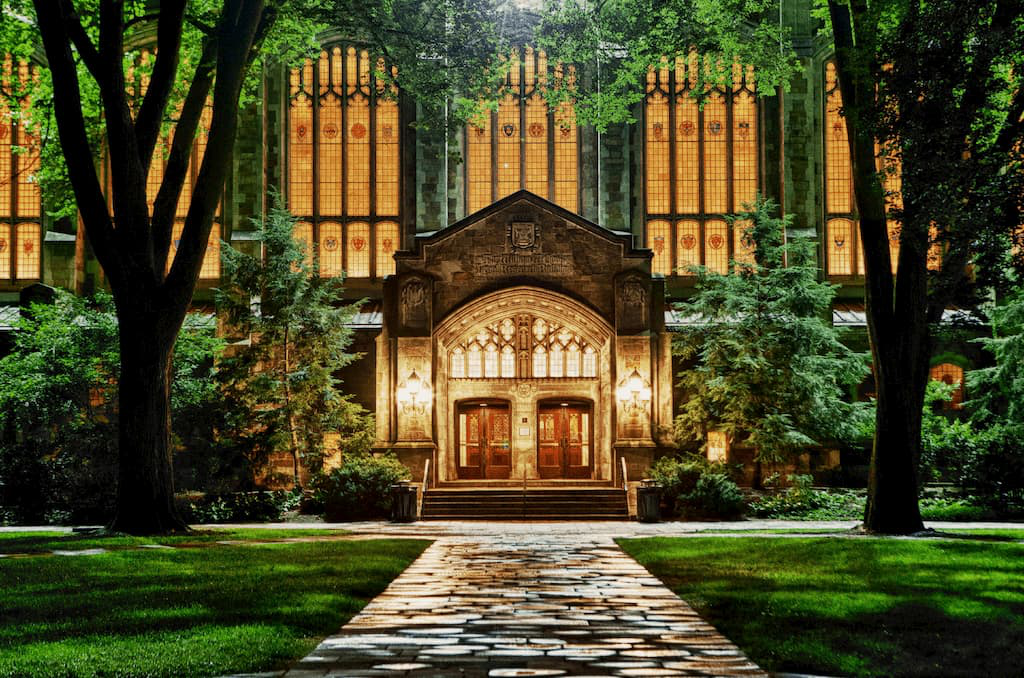

In [3]:
image = load("umlawlibrary.jpg") 

We convert the RGB image to a grayscale image and then the grayscale image into a matrix of floating point numbers and display its dimensions and rank, as in the next cell. 

In [ ]:
image_matrix_gray = float(Gray.(image))
@show size(image_matrix_gray)
@show rank(image_matrix_gray);

In [ ]:
scatter(svdvals(image_matrix_gray); label="singular values", xlabel="k", ylabel="sigma[k]")

Indeed! We will revisit the "continuous looking" portion of the spectrum later on!
We will now  compress the image, viewed as a matrix, using the SVD. In the next cell, we will vary the compression ratio and display the relative approximation error and the image.  

Recall that the [compression ratio](https://en.wikipedia.org/wiki/Data_compression_ratio) is the ratio of the size of the uncompressed image to the size of the compressed image. Thus a compression ratio of 1000 means that the compressed matrix uses $1/1000$-th  the number of bits as the original matrix and so on.

In [ ]:
@manipulate for compression_ratio in (200, 100, 20, 10, 4, 2)
    Ac, r, error, rel_error = compress_matrix(image_matrix_gray, 1/compression_ratio)
    heatmap(
        Ac; 
        color=:grays, 
        ticks=[], 
        yflip=true,
        title="Relative error = $(round(rel_error * 100; digits=2)) %, Optimal rank = $r",
        showaxis =:false
    )
end

It will be helpful to create a function that plots the relative approximation error as a function of the rank.

In [7]:
function svd_rank_k_approx_error(σ, k) 
    r = length(σ)
    if k == r
        rel_error = 0
    else
        rel_error = sqrt(sum(σ[(k + 1):r].^2)) / sqrt(sum(σ.^2))
    end
    return rel_error
end

svd_rank_k_approx_error (generic function with 1 method)

In [8]:
println("Computing SVD and rank of image matrix")
U, σ, V = svd(image_matrix_gray)
r = length(σ)
println("Rank of image matrix = $r")

Computing SVD and rank of image matrix


UndefVarError: UndefVarError: image_matrix_gray not defined

We now plot the relative approximation error as a function of the approximation rank.

In [9]:
# Compute relative errors
relative_error = zeros(r)
for k in 1:r
    relative_error[k] = svd_rank_k_approx_error(σ, k) 
end

# Plot errors
plot(
    1:r, 100 * relative_error;
    marker=:circle,
    label=:"relative error",
    ylabel="Relative error (percentage)", 
    xlabel="Rank of approximation",
    yscale=:identity,
)

UndefVarError: UndefVarError: r not defined

We now plot the approximation quality instead which approaches 100% when we have perfectly approximated

In [10]:
klist = (1, 2, 5, 10, 20, 50, 100, 200, 400, 600, r)

println("Zooming in. Select different values for max of xaxis.")
@manipulate for kmax in klist
    plot(
        1:r, 100 * (1 .- relative_error);
        marker=:circle, 
        label="(1 - relative error) x 100%", 
        ylabel="Approximation quality (%)", 
        xlabel="Rank of approximation",
        xlim=(0, kmax + 0.5),
        ylim=(0, 105),
        legend=:bottomright
    )
end

UndefVarError: UndefVarError: r not defined

Now we examine the visual quality of the optimal rank $k$ approximation by explicitly change the value of $k$.

In [11]:
println("Select different values for k and see how the visual quality of the approximation changes")
@manipulate for k in klist
    image_k_matrix = U[:,1:k] * Diagonal(σ[1:k]) * V[:,1:k]'
    heatmap(
        image_k_matrix;
        color=:grays,
        yflip=:true,
        ticks=[],
        title="Rank $k approx. Rel. error = $(round(100 * relative_error[k]; digits=3)) %."
    )
end

Select different values for k and see how the visual quality of the approximation changes


UndefVarError: UndefVarError: klist not defined

Low rank matrices are important because we they can be compressed and encoded with less information than the number of elements in the matrix. We will make contact with them next.

In [12]:
image = 0.0
image_matrix_gray = 0.0

0.0

Also, **before proceeding**, let us clear the output of the images above -- click *Cell --> All Output --> Clear*.

# Application: Denoising low rank matrices

We now examine a setting involving denoising of a low rank matrix. Mathematically we asume that we are given a signal-plus-noise matrix of the form

\begin{equation}
\widetilde{A} = \sum_{i=1}^{r} \theta_i u_i v_i^T + \textrm{ Noise-only matrix},
\end{equation}

where 

\begin{equation}
A = \sum_{i=1}^{r} \theta_i u_i v_i^T,
\end{equation}

is the rank $r$ **signal matrix**. 

Our goal is to *denoise* the matrix $\widetilde{A}$. In other words, we want to form an estimate of the matrix $A$ from $\widetilde{A}$ that is as close as possible to the matrix $A$.

To that end, we will use the function `tsvd` defined in the next cell -- this returns a rank $k$ approximation of the matrix argument. Our objective is to understand if and how well the `tsvd` function denoises $\widetilde{A}$. 

In [13]:
function tsvd(A::Matrix, k::Number)
    U, s, V = svd(A)
    error = sqrt(sum(s[(k + 1):end].^2))
    rel_error = error / sqrt(sum(s.^2))
    return U[:, 1:k] * Diagonal(s[1:k]) * V[:, 1:k]', error, rel_error
end

tsvd (generic function with 1 method)

We now load an image that is low-rank by design.  

size(image_matrix_gray) = (161, 312)


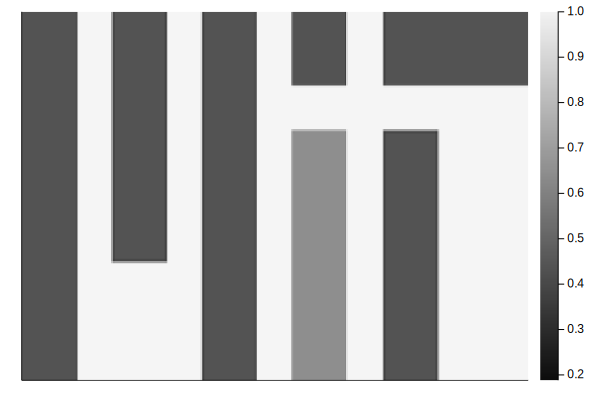

In [14]:
image_matrix_gray = float(Gray.(load("mit_logo.png")))
@show size(image_matrix_gray)
heatmap(image_matrix_gray; color=:grays, ticks=[], yflip=:true)

Let us plot the singular value spectrum of the matrix

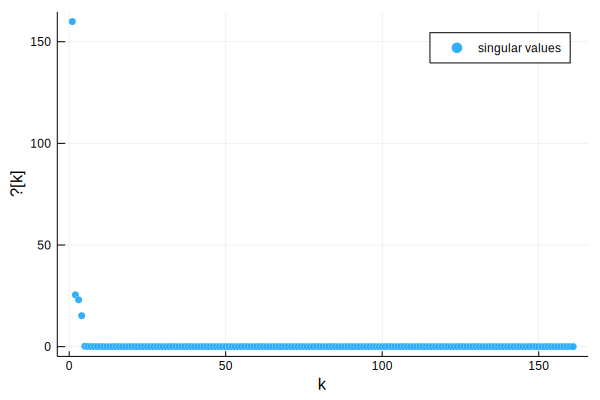

In [15]:
scatter(svdvals(image_matrix_gray); xlabel="k", ylabel="σ[k]", label="singular values")

The numerical rank of the image happens to be 7 -- the four significant singular values correspond to exactly the linearly independent "bars" in the MIT logo.  We will make  matrix exactly equal to a  rank 4 matrix using the code in the next cell. 

In [16]:
image_matrix_gray  = tsvd(image_matrix_gray, 4)[1];

 Next, we create a function `noisy_image` that adds noise to a matrix, as in the next cell.

In [17]:
function noisy_image(image, noise_variance) 
    return image + sqrt(noise_variance) * randn(size(image))
end

noisy_image (generic function with 1 method)

We will now add noise to the matrix 

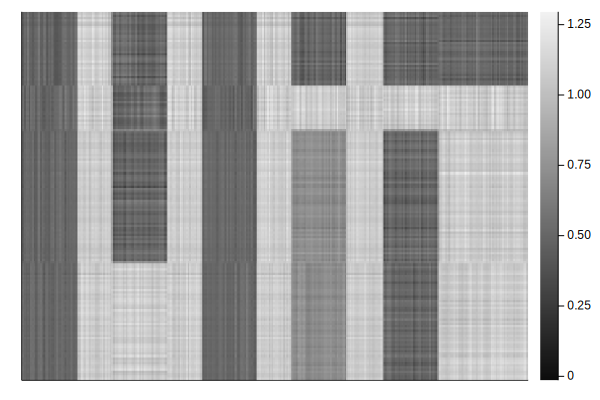

In [18]:
k = 4
noise_variance = 0.1
noisy_image_matrix_gray = noisy_image(image_matrix_gray, noise_variance)
image_matrix_rank_k, approx_error = tsvd(noisy_image_matrix_gray, k)
heatmap(image_matrix_rank_k; color=:grays, yflip=true, ticks= [])

Having created a noisy image in this manner, we will compute the low rank approximation fo the noisy matrix for a variety of `noise_variance` and `k` values, as in the next cell.

In [19]:
@manipulate for noise_variance in 0.1, k in (1, 2, 4, 50, 100, 161)
    noisy_image_matrix = noisy_image(image_matrix_gray, noise_variance)
    image_matrix_rank_k, approx_error_k = tsvd(noisy_image_matrix,k)

    p1 = heatmap(noisy_image_matrix; color=:grays, yflip=true, ticks=[], title="Noisy image")
    p2 = heatmap(
        image_matrix_rank_k;
        color=:grays,
        yflip=:true, ticks=[], 
        title="Err.  = $(round(approx_error_k; digits=2)) %,  k = $k "
    )
    plot(p1, p2; layout=(1, 2))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["noise_variance"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:attributes=>Dict{Any,Any}(:type=>"number",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"),:placeholder=>"",:className=>"input ",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Union{Nothing, Float64}} with 2 listeners. Value:
0.1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"value"=>Any[JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f0708690010])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"2640287816827172557\",\"id\":\"ob_07\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"2640287816827172557\",\"id\":\"ob_06\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\"

Let us examine the seeming discrepancy between the trend in the approximation versus the visual quality further. To that end, let us first note that the approximation error is **not the same as ** the denoising error.

The code in the following cell computes the denoising and the approximation error for a range of values of the approximation rank. 

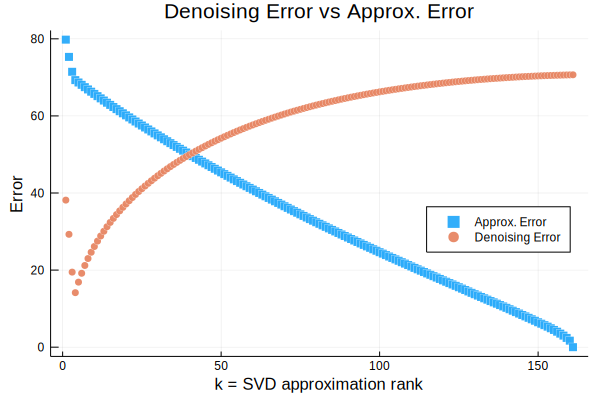

In [20]:
k_list = 1:minimum(size(image_matrix_gray))
denoise_error = zeros(length(k_list))
approx_error = zeros(length(k_list))
noise_variance = 0.1

noisy_image_matrix = noisy_image(image_matrix_gray, noise_variance)

for k in k_list 
    image_matrix_rank_k, approx_error_k = tsvd(noisy_image_matrix, k)
    approx_error[k] = approx_error_k
    denoise_error[k] = norm(image_matrix_gray - image_matrix_rank_k)
end

scatter(
    k_list, approx_error; 
    label="Approx. Error ", 
    marker=:square,
    ylabel="Error", 
    xlabel="k = SVD approximation rank",
    legend=:right
)
scatter!(k_list, denoise_error; label="Denoising Error", title=" Denoising Error vs Approx. Error")

Let us zoom in further. 

In [21]:
println("Click on xend to change the zoom display")
@manipulate for xend in (2, 5, 10, 50, 100, 161)
scatter(k_list, approx_error; label="Approx. Error", marker=:square, xlabel="k = SVD approximation rank")
    scatter!(
        k_list, denoise_error; 
        label="Denoising Error", 
        xlim=(1, xend + 1),
        ylabel="Error",
        legend=:bottom
    )
end

Click on xend to change the zoom display


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["xend"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"2","val"=>1,"id"=>"idk80Sarc7"), OrderedDict{String,Any}("key"=>"5","val"=>2,"id"=>"idu9ZZFLzR"), OrderedDict{String,Any}("key"=>"10","val"=>3,"id"=>"idi0EqkYUi"), OrderedDict{String,Any}("key"=>"50","val"=>4,"id"=>"id2YSjowsZ"), OrderedDict{String,Any}("key"=>"100","val"=>5,"id"=>"idVgYhvmEW"), OrderedDict{String,Any}("key"=>"161","val"=>6,"id"=>"idciNIM2KW")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f070c04ba90])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"option

How might we infer the rank of the low-rank signal matrix from the signal-plus-noise matrix which is typically full rank? We describe this next.

# Random matrix theory 101

Random matrix theory provides insights on what the singular values of noise-only matrices look like. This allows us to understand how the spectrum deviates when there is a signal-plus-noise matrix, and thus to identify the "optimal" denoising rank. We begin by displaying the singular values of a noise-only i.i.d. Gaussian matrix, as in the next cell.

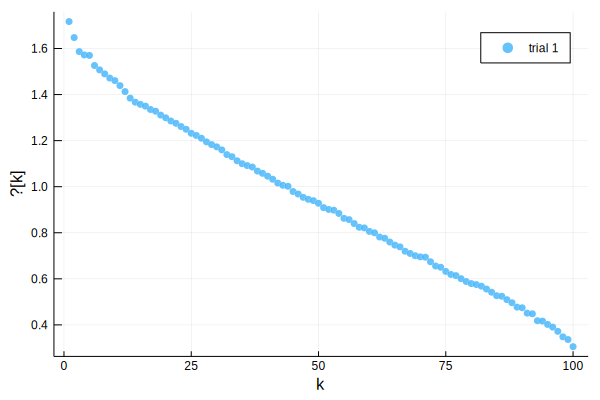

In [22]:
m, n = 100, 200 
noise_matrix = randn(m, n) / sqrt(n)
scatter(svdvals(noise_matrix); label="trial 1", xlabel="k", ylabel="σ[k]", alpha=0.6)

We shall superimpose on this plot the singular values of another independent noise-only matrix.

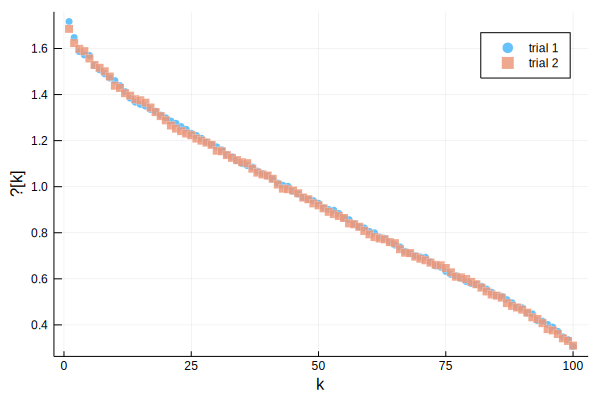

In [23]:
noise_matrix = randn(m, n) / sqrt(n)
scatter!(svdvals(noise_matrix); label="trial 2", marker=:square, alpha=0.6)

What happens if we double $m$ and $n$, as in the next cell?

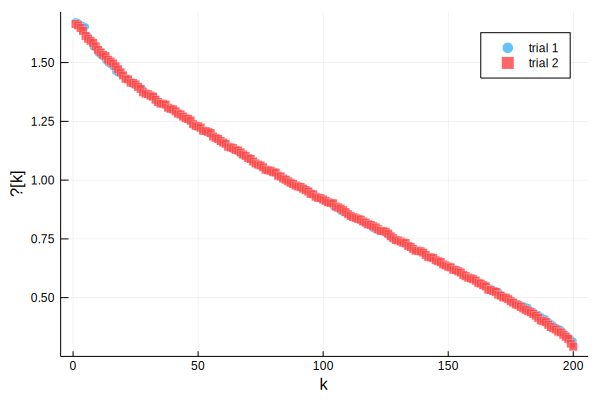

In [24]:
m = 2 * m
n = 2 * n

noise_matrix = randn(m, n) / sqrt(n)
scatter(svdvals(noise_matrix); label="trial 1", xlabel="k", ylabel="σ[k]", alpha=0.6)
noise_matrix = randn(m, n) / sqrt(n)
scatter!(svdvals(noise_matrix); label="trial 2", color=:red, marker=:square, alpha=0.6)

Indeed! What you are seeing is that the singular values of noise matrices are much more structured and regular looking than we expect "noise" to look like. This is the signature of "noise". We now examine the spectrum of a signal-plus-noise matrix using the code in the next cell. 

In [25]:
u, v = randn(m), randn(n)
u, v = u / norm(u), v / norm(v)
@manipulate for theta in round.((20, 10, 5, 2 * (m / n)^(1 / 4), 0.5 * (m / n)^(1 / 4), 0); digits=2)
    A = theta * u * v'
    scatter(svdvals(noise_matrix); label="noise", xlabel="k", ylabel="sigma[k]")
    scatter!(svdvals(A + noise_matrix); label="signal-plus-noise", color=:red, marker=:square)
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["theta"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"20.0","val"=>1,"id"=>"idehCfmo3P"), OrderedDict{String,Any}("key"=>"10.0","val"=>2,"id"=>"idHLbDRZi4"), OrderedDict{String,Any}("key"=>"5.0","val"=>3,"id"=>"idhFbDlhZX"), OrderedDict{String,Any}("key"=>"1.68","val"=>4,"id"=>"idYueivbNT"), OrderedDict{String,Any}("key"=>"0.42","val"=>5,"id"=>"id19uFinnZ"), OrderedDict{String,Any}("key"=>"0.0","val"=>6,"id"=>"ida6VQHBvN")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f07089c1390])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name

Try varying `theta` and observe how the singular values of the noise-only matrix are related to the singular values of the signal-plus-noise matrix. 

When we have a low rank signal matrix that is buried in noise, then we can estimate the rank of the low-rank matrix by counting the number of singular values that "escape" from the noise spectrum. Of course, we  would like to determine this algorithmically -- we will discuss more about this later.  

## Application: Inferring the optimal denoising rank 

Let us plot the singular values of the noisy MIT logo matrix and see if what we have deduced stands up to the test of practice. 

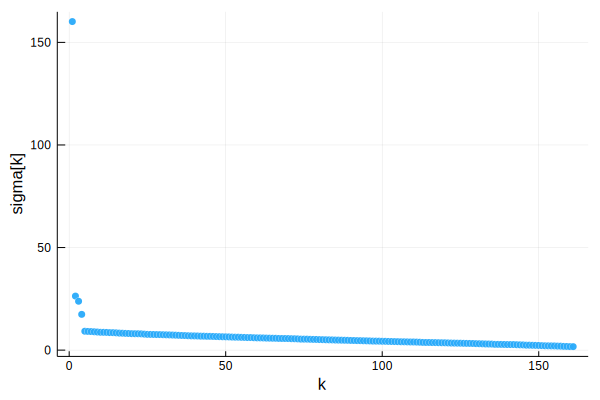

In [26]:
scatter(svdvals(noisy_image_matrix); xlabel="k", ylabel="sigma[k]", label="")

Does this trend hold up for other values of the noise variance? We explore this next. 

In [27]:
@manipulate for noise_variance in (0, 0.1, 0.5, 1, 4)
    noisy_image_matrix = noisy_image(image_matrix_gray, noise_variance)
    denoise_error = zeros(length(k_list))
    for k in k_list 
        image_matrix_rank_k, approx_error_k = tsvd(noisy_image_matrix, k)
        denoise_error[k] = norm(image_matrix_gray - image_matrix_rank_k)
    end

    p1 = scatter(
        k_list, denoise_error; 
        label="Denoising Error",
        xlabel="k", 
        ylabel="Error"
    )
    p2 = scatter(svdvals(noisy_image_matrix); xlabel="k", ylabel="sigma[k]")
    
    plot(p1, p2; layout=(2, 1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["noise_variance"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"0","val"=>1,"id"=>"id97eh8M3B"), OrderedDict{String,Any}("key"=>"0.1","val"=>2,"id"=>"idK0oIvrqY"), OrderedDict{String,Any}("key"=>"0.5","val"=>3,"id"=>"idlYNEzL6L"), OrderedDict{String,Any}("key"=>"1","val"=>4,"id"=>"idH1XenORW"), OrderedDict{String,Any}("key"=>"4","val"=>5,"id"=>"id0oycuRWH")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f070d8744f0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"12472331558305395842\",\"id\":\"ob_45\

# Summary: Approximation vs Denoising

Increasing the rank *reduces* the approximation error. Increasing the rank decreases the denoising error -- but only up to a point. After the optimal rank, which is governed by the rank of the matrix that is being denoised, the denoising error will increase. The approximation error, relative to the noisy matrix will continue to decrease. This is not a paradox. The tricky thing is determining the optimal denoising rank. We have seen how the spectral signature of such matrices can help. 

# Additional Exercises

## Image compression and visual quality

Turn in a plot showing how the visual quality of the University of Michigan Law Library image changes as a function of the compression ratio.

In [28]:
## TODO: your code here
image = load("umlawlibrary.jpg") 
image_matrix_gray = float(Gray.(image))
m, n = size(image_matrix_gray)
println("Select different values for the compressopm ratio p and see how the visual quality of the approximation changes")

@manipulate for compression_ratio in (400, 200, 80, 40, 20, 8, 4, 2)
    Ac, r, error, rel_error = compress_matrix(image_matrix_gray, 1/compression_ratio)
    heatmap(
        Ac; 
        color=:grays, 
        ticks=[], 
        yflip=true,
        title="Relative error = $(round(rel_error * 100; digits=2)) %, Optimal rank = $r",
        showaxis =:false
    )
end

Select different values for the compressopm ratio p and see how the visual quality of the approximation changes


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["compression_ratio"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"400","val"=>1,"id"=>"idqPayoR31"), OrderedDict{String,Any}("key"=>"200","val"=>2,"id"=>"id8CEfiWpW"), OrderedDict{String,Any}("key"=>"80","val"=>3,"id"=>"iduztybSwn"), OrderedDict{String,Any}("key"=>"40","val"=>4,"id"=>"idF8WCvW38"), OrderedDict{String,Any}("key"=>"20","val"=>5,"id"=>"idQWW3Lv66"), OrderedDict{String,Any}("key"=>"8","val"=>6,"id"=>"idOkTnN31B"), OrderedDict{String,Any}("key"=>"4","val"=>7,"id"=>"id9bc9W0bn"), OrderedDict{String,Any}("key"=>"2","val"=>8,"id"=>"idfsG4kNXa")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f0709b889d0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n    

Plot approximation error vs rank for the Law Library image.

Rank of image matrix = 678


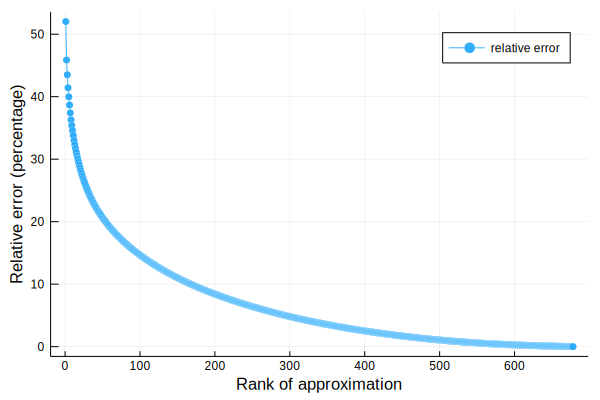

In [29]:
## TODO: your code here

U, σ, V = svd(image_matrix_gray)
r = length(σ)
println("Rank of image matrix = $r")

# Compute relative errors
relative_error = zeros(r)
for k in 1:r
    relative_error[k] = svd_rank_k_approx_error(σ, k) 
end

# Plot errors
plot(
    1:r, 100 * relative_error;
    marker=:circle,
    label=:"relative error",
    ylabel="Relative error (percentage)", 
    xlabel="Rank of approximation",
    yscale=:identity,
)

Now **take your own picture** and generate  a plot illustrating how the visual quality varies with compression ratio. 

In [30]:
## TODO: your code here showing visual quality for compression ratio = 2, 10, 40
image = load("hw4.jpg") 
image_matrix_gray = float(Gray.(image))
@show size(image_matrix_gray)
@show rank(image_matrix_gray);

@manipulate for compression_ratio in (2, 10, 40)
    Ac, r, error, rel_error = compress_matrix(image_matrix_gray, 1/compression_ratio)
    heatmap(
        Ac; 
        color=:grays, 
        ticks=[], 
        yflip=true,
        title="Relative error = $(round(rel_error * 100; digits=2)) %, Optimal rank = $r",
        showaxis =:false
    )
end

size(image_matrix_gray) = (1080, 1440)
rank(image_matrix_gray) = 1080


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["compression_ratio"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"2","val"=>1,"id"=>"idYUCTnXZL"), OrderedDict{String,Any}("key"=>"10","val"=>2,"id"=>"id6fhkG49q"), OrderedDict{String,Any}("key"=>"40","val"=>3,"id"=>"id9Ex0Vmog")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007f07091b3a90])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"8228033676658305406\",\"id\":\"ob_67\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"8228033676658305406\",\"id\":\"ob_66\",\"type\"

For your picture, turn in a plot of approximation error vs rank.

Rank of image matrix = 1080


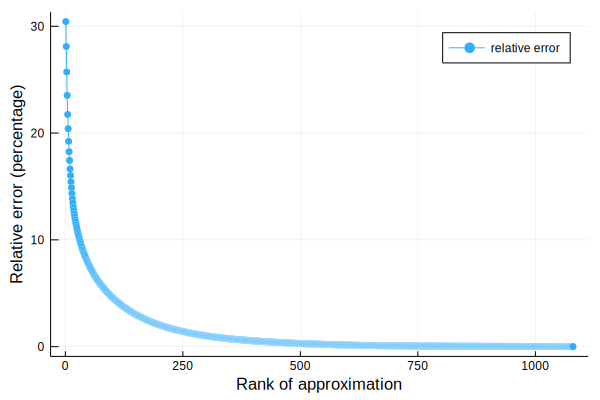

In [31]:
## TODO: your code here
U, σ, V = svd(image_matrix_gray)
r = length(σ)
println("Rank of image matrix = $r")

# Compute relative errors
relative_error = zeros(r)
for k in 1:r
    relative_error[k] = svd_rank_k_approx_error(σ, k) 
end

# Plot errors
plot(
    1:r, 100 * relative_error;
    marker=:circle,
    label=:"relative error",
    ylabel="Relative error (percentage)", 
    xlabel="Rank of approximation",
    yscale=:identity,
)

**Exercise**: What is a rank for which your compressed image is good enough? How did you determine what "good enough" is? What is the compression ratio achieved for this rank? 

## Noise variance and de-noising error

Include a plot of the approximation error versus denoising error for different values of the noise variance. Zoom in sufficiently (by changing `xlim` or `ylim`) so you can see the optimal denoising rank versus the optimal approximation rank. 

In [ ]:
## TODO: your code here
k_list = 1:minimum(size(image_matrix_gray_lib))
denoise_error = zeros(length(k_list))
approx_error = zeros(length(k_list))
noise_variance = 0.1

noisy_image_matrix = noisy_image(image_matrix_gray, noise_variance)

for k in k_list 
    image_matrix_rank_k, approx_error_k = tsvd(noisy_image_matrix, k)
    approx_error[k] = approx_error_k
    denoise_error[k] = norm(image_matrix_gray - image_matrix_rank_k)
end

scatter(
    k_list, approx_error; 
    label="Approx. Error ", 
    marker=:square,
    ylabel="Error", 
    xlabel="k = SVD approximation rank",
    legend=:right
)
scatter!(k_list, denoise_error; label="Denoising Error", title=" Denoising Error vs Approx. Error")

**Exercise**: When is the optimal denoising rank the same as the optimal approximation rank?

**Exercise**: When is the optimal approximation rank greater than the optimal denoising rank?

**Exercise**: Is it possible for the optimal approximation rank to be less than the optimal denoising rank?

# (Optional) Improved denoising using Optshrink 

It turns that random matrix theory provides additional insights such as a concrete method for better denoising the low rank matrix than the `tsvd` method we have used thus far. This method is called OptShrink and  described in the next cell.

In [ ]:
"""
Perform rank-r denoising of data matrix Y using OptShrink
using the method described in the
IEEE Transactions on Information paper:
http://doi.org/10.1109/TIT.2014.2311661

Input
Y		2D array where Y = X + noise and goal is to estimate X
r		estimated rank of X

Output
Xh	rank-r estimate of X using OptShrink weights for SVD components

This version works only if the size of Y is sufficiently small,
because it performs calculations involving arrays roughly of
size(Y' * Y) and size(Y * Y') so neither dimension of Y can be large.
"""
function optshrink_inefficient(Y::Matrix, r::Number)
    w = ??
    Xh = U[:, 1:r] * diagm(w) * V[:, 1:r]' # (m,r) (r,r) (n,r)'

    return Xh
end